# Investigating the Titanic Dataset
## Data Investigation Project
#### Data Analyst Nanodegree (Udacity)
Project submission by Edward Minnett (ed@methodic.io).

March 19th 2016. (Revision 1)

----------

## Project Introduction

This project endeavours to explore the Titanic Survival data as provided by Kaggle.com. The purpose of the project is to not only explore this data, but also to explore the process of rigourous and analytical data exploration techniques using the Pandas and NumPy Python libraries. The project will also include the application of the Seaborn data visualisation library and statistical tests found in the SciPy Stats library. The project is structured as follows:

- An initial exploration of the data including a description of the variables that structure the data.
- A presentation of questions to be answered through an anlytical exploration of the data.
- The Data Wrangling required to answer these questions.
- Answers to the proposed questions utilising reusable function that encapsulate the application of the Python libraries mentioned above.
- A final analysis of the data and summary of the analysis performed throughout the project.

## Load the Data and Perform an Initial Investigation

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# The original data set for this project is the training data for the Titanic Data Science competition on Kaggle [1].
train_titanic_df = pd.read_csv('./titanic_data.csv')
# The test data from Kaggle used to supplement the original data set. The survivorship data has been added to 
# the test dataset from several sources [2][3][4].
test_titanic_df = pd.read_csv('./titanic_data_(test)_with_survived.csv')
# Reset the index of the test data to prepare for concatenation.
test_titanic_df = test_titanic_df.set_index([range(len(train_titanic_df),(len(train_titanic_df)+len(test_titanic_df)))])
# Concatenate the two dataframes to create the single dataframe will analyse.
titanic_df = pd.concat([train_titanic_df, test_titanic_df])

# Fix the column order
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']
titanic_df = titanic_df[columns]

print "The first 5 rows of the Modified Titanic data set:"
display(titanic_df.head())

The first 5 rows of the Modified Titanic data set:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


The following is a description of the variables in this dataset. This description has been copied from the data source found at Kaggle.com [1].

**VARIABLE DESCRIPTIONS:**
- survival       - Survival (0 = No; 1 = Yes)
- pclass         - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name           - Name
- sex            - Sex
- age            - Age
- sibsp          - Number of Siblings/Spouses Aboard
- parch          - Number of Parents/Children Aboard
- ticket         - Ticket Number
- fare           - Passenger Fare
- cabin          - Cabin
- embarked       - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES:**

Pclass is a proxy for socio-economic status (SES) - 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1) - If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [2]:
print "Descriptive statistics for numeric data ('PassengerId' has been removed as this is just an incremental index):"
display(titanic_df.ix[:, titanic_df.columns != 'PassengerId'].describe())

Descriptive statistics for numeric data ('PassengerId' has been removed as this is just an incremental index):


,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1132.000000,1309.000000,1309.000000,1308.000000
mean,0.379679,2.294882,29.682571,0.498854,0.385027,33.295479
std,0.485492,0.837836,14.107118,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


From this initial description of numerical variables we can infer the following:

- Fewer than 4 in 10 passengers survived.
- More than half of the passengers were in the lowest socio-economic group.
- At least a quarter of the passengers whose ages are known were in their 20s when the Titanic sank.
- The age is unkown for 177 passengers, more than 10% of the records.
- More than half of the passengers were travelling without siblings or spouses and more than three quarters of the passengers were travelling without parents or children but we can not infer that these are necsserily the same passengers.
- At least one passenger paid nothing for their ticket (or this is anomolous data).
- More than three quarters of passengers paid less than 10% of the most expensive fare.

## Questions to Investigate

Now that we have uncovered a few superficial trends, we can define a few further reaching questions that will guide a deeper exploration of the data. This exploration will drive the structure and direction of the remainder of the project.

- What are the extrema in age and fare for passenegers who survived or didn't survive? Who are these passengers?
- Is there a relationship between socio-economic status and the size of families aboard the Titanic?
- Is there a relationship between socio-economic status and where the passengers embarked?
- Were passengers with higher socio-economic status more likely to survive?
- Were men or women more likely to survive?
- Were passengers of certain ages likely to survive?
- Is a passeneger's socio-economic status, gender, or age the better indicator of their survival?

## Wrangle and Tidy the Data

In order to support the answering of each of these questions, we will need to apply a few modfications to the data. Though the data includes data describing sibling / spouse and parent / child relationships, we will want a single variable that represents the whole family size. 

The 'Age' variable will prove more challenging. The initial investigation of the data shows that 177 records are missing the 'Age' value. It will also be advantageous to collect the ages into a smaller number of categories in order to make comparative analysis clearer. One way to do this is to group the ages by decade leaving this new variable with 9 categories (including one for missing ages) instead of a different category every value in the data. We will also want a version of the DataFrame that excludes records where the new 'AgeByDecade' only includes values that describe a meaningful realtionship with 'Survived'. The analysis will show that only the decades from 0s to 60s include records that represent both survived and not survived. We will also want to exclude the records with missing ages from this version of the DataFrame.

The answer to the final question will lead to further analysis as a part of the project conclusion that will require grouping gender and socio-economic status in order to allow comparative analysis of these two variables with respect to their relationship with the 'Survived' variable. As with the considerations discussed above for 'Age', it will be advantageous to create another version of the DataFrame to support this final analysis. Even though it may be possible to use advanced indexing or groups to handle this, creating a single column that represnts the combination of these variables will allow the reuse of the same analytical functions that will be used to answer the other questions above.

In [3]:
import math

def age_to_decade_category(age):
    if str(age) == 'nan': 
        return '?'
    floor = int(math.floor(age/10.0) * 10)
    return str(floor) + 's'

# The modified Titanic DataFrame.
mod_titanic_df = titanic_df.copy()

# Create a single column for family size aboard the Titanic that is the sum of siblings and parents.
mod_titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Decade of age (leading digit of two digit age) with a '?' for unknown ages.
mod_titanic_df['AgeByDecade'] = titanic_df['Age']
mod_titanic_df['AgeByDecade'] = mod_titanic_df['AgeByDecade'].apply(age_to_decade_category)

# Correct the order of the columns
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'AgeByDecade',
          'SibSp', 'Parch', 'FamilySize', 'Ticket', 'Fare', 'Embarked']
mod_titanic_df = mod_titanic_df[columns]

# Make a copy of the data that only includes records with known ages less than 70.
# (to supplement the AgeByDecade analysis.)
df_with_consistent_ages = mod_titanic_df[(mod_titanic_df['Age'] < 70)]

# Make a copy of the data and then add a new column that combines the values of Sex and Pclass.
# (to support the final analysis.)
df_with_combined_sex_and_pclass = mod_titanic_df.copy()
df_with_combined_sex_and_pclass['SexPclass'] = mod_titanic_df['Sex'] + "-" + mod_titanic_df['Pclass'].apply(str)

mod_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,20s,1,0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,30s,1,0,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,20s,0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,30s,1,0,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,30s,0,0,0,373450,8.0500,S


## What are the extrema in age and fare for passenegers who survived or didn't survive? Who are these passengers?

In [4]:
def passenger_by_survival_and_variable_extrema(survived, variable, extrema):
    survival_filter = mod_titanic_df['Survived'] == survived
    extrema_value   = getattr(mod_titanic_df[survival_filter][variable], extrema)()
    query_string    = str(variable) + ' == ' + str(extrema_value)
    passenger       = mod_titanic_df[survival_filter].query(query_string)
    return passenger

def age_and_fare_exterma_analysis_by_survival(survived):
    survival_wording = 'survived' if survived else 'did not survive'
    print "The oldest passeneger(s) who %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Age', 'max'))
    print"\n"
    print "The youngest passeneger(s) who %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Age', 'min'))
    print"\n"
    print "The passeneger(s) who paid the most and %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Fare', 'max'))
    print"\n"
    print "The passeneger(s) who paid the least and %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Fare', 'min'))

#### Extrema for passenegers who survived.

In [5]:
age_and_fare_exterma_analysis_by_survival(survived=1)

The oldest passeneger(s) who survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,80s,0,0,0,27042,30,S




The youngest passeneger(s) who survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
1245,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina",female,0.17,0s,1,2,3,C.A. 2315,20.575,S




The passeneger(s) who paid the most and survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,30s,0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,30s,0,1,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,30s,0,0,0,PC 17755,512.3292,C
1234,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58,50s,0,1,1,PC 17755,512.3292,C




The passeneger(s) who paid the least and survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25,20s,0,0,0,LINE,0,S
1263,1264,1,1,"Ismay, Mr. Joseph Bruce",male,49,40s,0,0,0,112058,0,S


#### Extrema for passenegers who did not survive.

In [6]:
age_and_fare_exterma_analysis_by_survival(survived=0)

The oldest passeneger(s) who did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74,70s,0,0,0,347060,7.775,S




The youngest passeneger(s) who did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
1092,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0s,0,2,2,347080,14.4,S




The passeneger(s) who paid the most and did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,10s,3,2,5,19950,263,S
438,439,0,1,"Fortune, Mr. Mark",male,64,60s,1,4,5,19950,263,S




The passeneger(s) who paid the least and did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,30s,0,0,0,LINE,0,S
263,264,0,1,"Harrison, Mr. William",male,40,40s,0,0,0,112059,0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,?,0,0,0,239853,0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,10s,0,0,0,LINE,0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,?,0,0,0,239853,0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,?,0,0,0,239853,0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,?,0,0,0,239854,0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49,40s,0,0,0,LINE,0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,?,0,0,0,112052,0,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,?,0,0,0,239856,0,S


It is surprising that there are so many passengers whose fare was 0. It is less surprisng that there are passengers with unkown ages, but fare prices should not have been 'lost' so the 0 values are less likely to be a result of bad data. Upon doing some further research, it appears that there were passenegers who effectively received free tickets though it is still surprising that some of these passengers received free tickets for first class acommodation. Some of these passenegers were under the employment of other passenegers (servants and butlers), but perhaps more interestingly there were a handlful of passenegers who were sent by Harland & Wolff, the company that built the Titanic [5].

Other patterns in the extrema are vary in how surprising they are. It is expected that the passeneger who paid the most have the highest socio-economic status and it is rather telling, though not surprising, that the oldest passeneger to survive has high socio-economic status while the oldest passeneger who did not survive had low socio-economic status. What is more surprising is that 24 of the 27 passenegers represented in this extrema analysis are male. It is not entirely clear why this. Later analysis will show that there are more males in this dataset than females, but not matching these proportions.

## Set Up Code to Support the Analysis of Two Categorical Variables

In [7]:
import seaborn as sns
from scipy.stats import chisquare, chi2_contingency, norm
%matplotlib inline

def descriptive_statistics_of_numeric_series(var, label, df=mod_titanic_df):
    """ Simple descriptive analysis of the numeric values for the series df[var]."""
    series = df[var]
    print "Summary Statistics for '" + label + "'"
    print "Median: " + str(series.median())
    print "Mean: " + str(series.mean())
    print "Standard Deviation: " + str(series.std())
    print "\n"

    
def visual_analysis_of_two_categorical_variables(var_a, var_b, df=mod_titanic_df):
    """ Produces a 3 part plot. The left most plot illustrates the counts for each sorted unique 
    value in df[var_a]. The right most plot is exactly like the first plot except for var_b. 
    The middle plot is a violin plot illustrating the relationship between var_a and var_b. 
    Violin plots are particularly good at illustrating the relative magnitude of the frequencies 
    for combinations of categorical values.    
    """
    series_a = df[var_a].sort_values()
    series_b = df[var_b].sort_values()
    colour_palette = "GnBu_d"
    sns.plt.figure(figsize=(16, 6))
    sns.plt.subplot(1,3,1)
    sns.plt.title("Count Plot for '" + var_a + "'")
    sns.countplot(series_a, palette=colour_palette)
    sns.plt.subplot(1,3,2)
    sns.plt.title("'" + var_a + "' vs '" + var_b + "' Violin Plot")
    sns.violinplot(x=series_a, y=series_b, palette=colour_palette, inner="stick")
    sns.plt.subplot(1,3,3)
    sns.plt.title("Count Plot for '" + var_b + "'")
    sns.countplot(series_b, palette=colour_palette)
    sns.plt.tight_layout()
    sns.plt.show()

def all_values_are_integers(df):
    """ Determines whether all of the values in DataFrame are integers. 
    NB: This function won't work if the DataFrame is composed of mixed types.
    """
    types = set(df.dtypes.apply(str))
    df_contains_only_ints = len(types) == 1 and 'int64' in types
    df_contains_only_floats = len(types) == 1 and 'float64' in types
    return df_contains_only_ints or (df_contains_only_floats and
                                     np.sum(df.applymap(str).applymap(lambda x: int(x.split('.')[1])).values) == 0)

def heatmap(contingency_df, title):
    """ Rnders a heatmap representation of the given Contingency DataFrame."""
    if all_values_are_integers(contingency_df):
        contingency_df = contingency_df.applymap(int)
        fmt = "d"
    else:
        fmt = "10.3f"
        
    print title
    colour_palette = "YlGnBu"
    sns.plt.figure(figsize=(16, 3))
    ax = sns.heatmap(contingency_df, annot=True, fmt=fmt, cmap=colour_palette)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    sns.plt.show()
    

def table_of_frequencies(var_a, var_b, df=mod_titanic_df, margins=True, normalise=False, axis='columns'):
    """ Creates a contingency table of the frequency of records that match the combination of features 
    represented by the intersection of rows and columns. The contingency table can be very valuable when 
    investigating the exact values that define the relationship between the two given variables [6].
    
    If margins is True, the sum for each row, column and the grand total will be included. 
    If normalise and margins are True, the frequencies will be normalised so that the sum is 1. 
    By default, this normalisation is performed so that way the column sums are 1. 
    Axis can be set to 'rows' to normalise so that the row sums are 1.
    """
    freq_tab = df.pivot_table(index=var_a, columns=var_b, values='PassengerId', 
                                margins=margins, fill_value=0, aggfunc=lambda x: len(x.unique()))
    if normalise and margins:
        if axis == 'columns':
            freq_tab = freq_tab.div(freq_tab.iloc[-1:].values[0])
        elif axis == 'rows':
            freq_tab = freq_tab.div(freq_tab.iloc[:,-1], axis=0)
    
    return freq_tab


def chi_squared_and_carmers_v_anlysis(var_a, var_b, df=mod_titanic_df):
    """ Performs a χ² test of independence with an alpha level of 0.001. χ² are particularly well suited for 
    analysing the independence of categorical data [7]. Given that nearly all of the data analysed to answer 
    the exploratory questions are categorical, it was decided this was the most suitable test to perform. 
    This function includes the results of a Cramer's V measure of association.
    """
    vars_str = var_a + " and " + var_b
    freq_tab = table_of_frequencies(var_a, var_b, df, margins=False)
    alpha = 0.001
    conf = (1 - alpha)*100
    print "χ²: " + vars_str
    print "H0: The null hypothesis for this χ² test is that " + vars_str + " are independent of each other."
    print "HA: The alternative hypothesis for this χ² test is that " + vars_str + " are in some way dependent."
    print ("For this test, we are considering an alpha level " + str(alpha) + " allowing for " + str(conf) + "% " +
        "level of confidence.")
    chi2, p, dof, ex = chi2_contingency(freq_tab)
    dof_label = ("degree" if dof == 1 else "degrees") + " of freedom"
    outcome = ("With a p-value of " + str(p) + " and a χ² statistic of " + str(chi2) + " with " + 
        str(dof) + " " + dof_label  + " we\n")
    reject_null = p < alpha
    if reject_null:
        outcome += "reject the null hypothesis and accept that " + vars_str + " are in some way dependent [7]."
    else:
        outcome += "fail to reject the null hypothesis that " + vars_str + " are independent [7]."
    hr = "-----------------------------------------------------------------------------------------------------"
    print hr
    print outcome
    print hr
    print cramers_v_anlysis(vars_str, chi2, freq_tab.shape, df)
    print hr


def cramers_v_anlysis(vars_str, chi2, pivot_table_shape, df=mod_titanic_df):    
    """ Calculates Cramer's V measure of association [8]. Once the χ² statistic and Cramer's V measure are claculated, 
    it is important to be able to interpret their meaning relative to the data analysed. This interpretation takes 
    the form of Cohen' guidlines for effect size [9].
    """
    V = math.sqrt(chi2 / len(df) / (min(pivot_table_shape) - 1))
    response = ("The Cramer's V measure of association for " + vars_str + " has a value of " + str(V) + "\n" +
        "equating to a ")
    if V < 0.1: response += "ineffectual"
    elif V < 0.2: response += "small"
    elif V < 0.3: response += "small to medium"
    elif V < 0.4: response += "medium"
    elif V < 0.5: response += "medium to large"
    else: response += "large"
    response += " effect size [8][9]."
    return response
    

## Is there a relationship between socio-economic status and the size of families aboard the Titanic?

Summary Statistics for 'Socio-Economic Status (Pclass)'
Median: 3.0
Mean: 2.294881589
Standard Deviation: 0.83783601897


Summary Statistics for 'Family Onboard (FamilySize)'
Median: 0.0
Mean: 0.883880825057
Standard Deviation: 1.58363908654




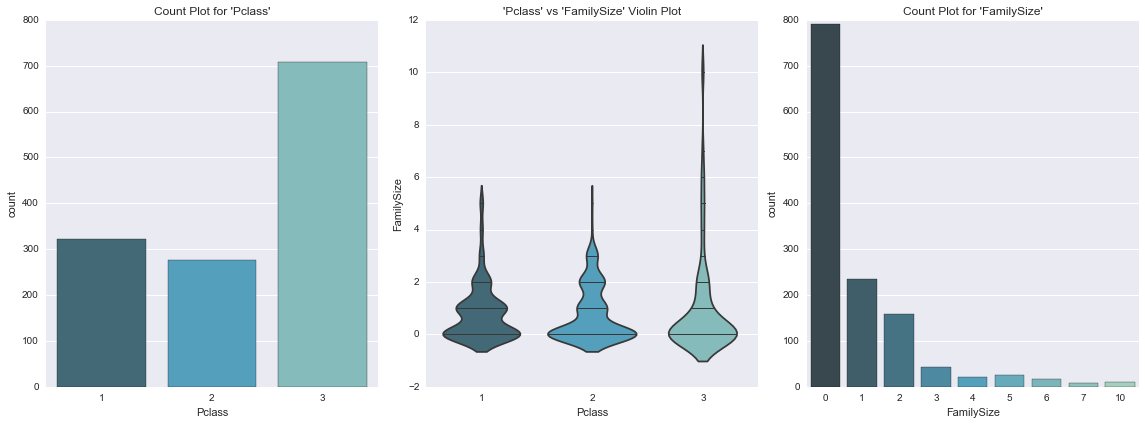

'Pclass' vs 'FamilySize' Contingency Heatmap:


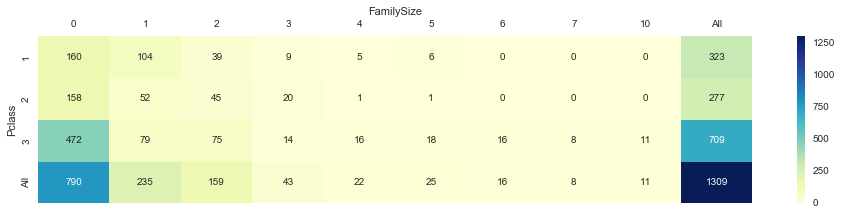

'Pclass' vs 'FamilySize' Normalised Contingency Heatmap:


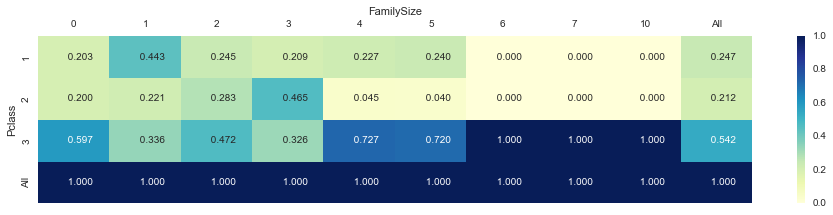

χ²: Pclass and FamilySize
H0: The null hypothesis for this χ² test is that Pclass and FamilySize are independent of each other.
HA: The alternative hypothesis for this χ² test is that Pclass and FamilySize are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 2.05373355084e-19 and a χ² statistic of 127.395301114 with 16 degrees of freedom we
reject the null hypothesis and accept that Pclass and FamilySize are in some way dependent [7].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Pclass and FamilySize has a value of 0.220593079597
equating to a small to medium effect size [8][9].
-----------------------------------------------------------------------------------------------------


In [8]:
descriptive_statistics_of_numeric_series('Pclass', "Socio-Economic Status (Pclass)")
descriptive_statistics_of_numeric_series('FamilySize', "Family Onboard (FamilySize)")
visual_analysis_of_two_categorical_variables('Pclass', 'FamilySize')

heatmap_title = "'Pclass' vs 'FamilySize' Contingency Heatmap:"
heatmap(table_of_frequencies('Pclass', 'FamilySize'), heatmap_title)

heatmap_title = "'Pclass' vs 'FamilySize' Normalised Contingency Heatmap:"
heatmap(table_of_frequencies('Pclass', 'FamilySize', normalise=True), heatmap_title)

chi_squared_and_carmers_v_anlysis('Pclass', 'FamilySize')

It does appear that there is a relationship between socio-economic status and family size on board the Titanic. The χ² test for these two variables confirms this with a 99.9% level of confidence. The value of Cramer's V suggests that the there is a small to medium effect size between the two variables. In general, the trend suggests that given a passenger from this data set, they are more likely to have the lowest socio-economic status than not if their family size is either zero or larger than 3 while first class passenegers who have other family members on board are nearly twice as likely to have only one family member with them than more than one (104 vs 59).

## Is there a relationship between socio-economic status and where the passengers embarked?

Summary Statistics for 'Socio-Economic Status (Pclass)'
Median: 3.0
Mean: 2.294881589
Standard Deviation: 0.83783601897


To aid this analysis, the three ports of embarkation are Cherbourg (C), Queenstown (Q) and Southampton (S).


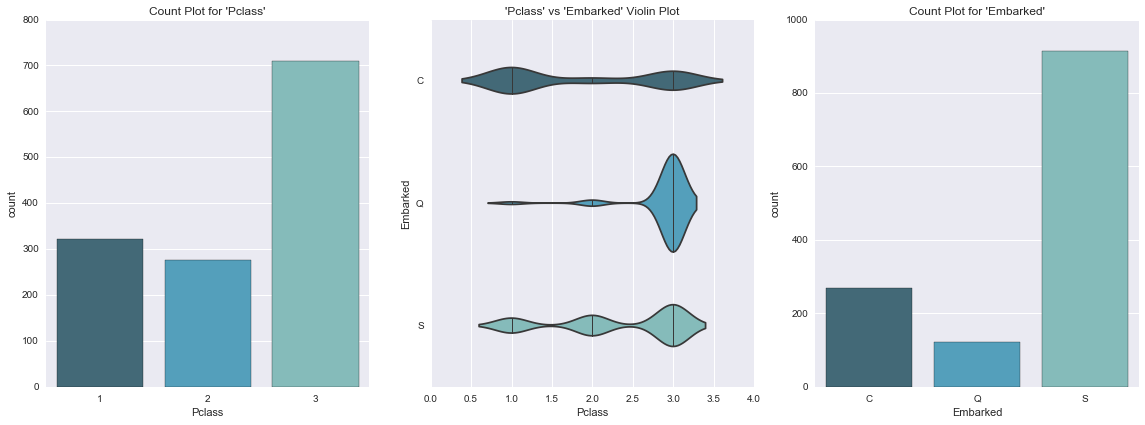

'Pclass' vs 'Embarked' Contingency Heatmap:


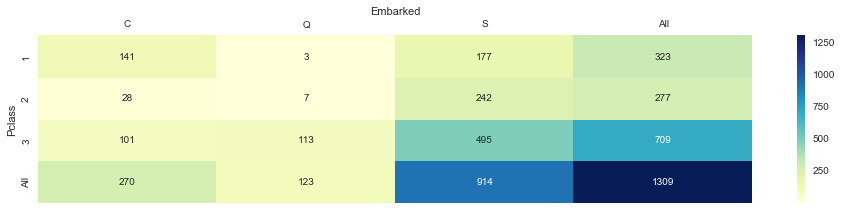

'Pclass' vs 'Embarked' Normalised (by column) Contingency Heatmap:


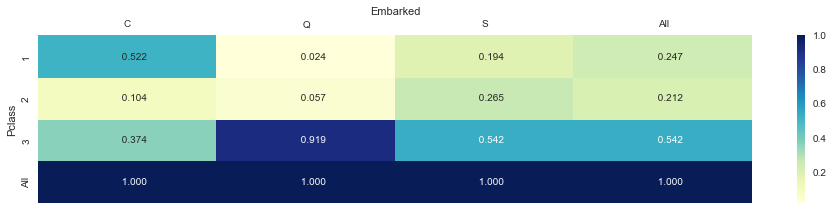

'Pclass' vs 'Embarked' Normalised (by row) Contingency Heatmap:


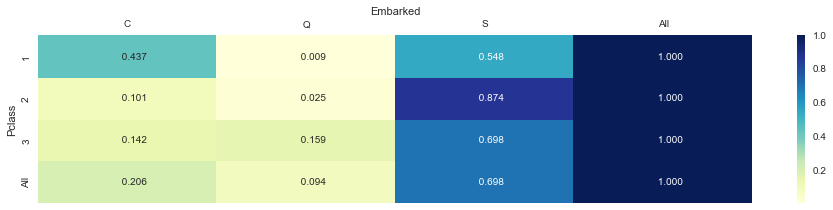

χ²: Pclass and Embarked
H0: The null hypothesis for this χ² test is that Pclass and Embarked are independent of each other.
HA: The alternative hypothesis for this χ² test is that Pclass and Embarked are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 2.13623259389e-43 and a χ² statistic of 205.79100157 with 4 degrees of freedom we
reject the null hypothesis and accept that Pclass and Embarked are in some way dependent [7].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Pclass and Embarked has a value of 0.280367952037
equating to a small to medium effect size [8][9].
-----------------------------------------------------------------------------------------------------


In [9]:
descriptive_statistics_of_numeric_series('Pclass', "Socio-Economic Status (Pclass)")

print "To aid this analysis, the three ports of embarkation are Cherbourg (C), Queenstown (Q) and Southampton (S)."

visual_analysis_of_two_categorical_variables('Pclass', 'Embarked')

heatmap_title = "'Pclass' vs 'Embarked' Contingency Heatmap:"
heatmap(table_of_frequencies('Pclass', 'Embarked'), heatmap_title)

heatmap_title = "'Pclass' vs 'Embarked' Normalised (by column) Contingency Heatmap:"
heatmap(table_of_frequencies('Pclass', 'Embarked', normalise=True), heatmap_title)

heatmap_title = "'Pclass' vs 'Embarked' Normalised (by row) Contingency Heatmap:"
heatmap(table_of_frequencies('Pclass', 'Embarked', normalise=True, axis='rows'), heatmap_title)

chi_squared_and_carmers_v_anlysis('Pclass', 'Embarked')

There is a relationship between 'Pclass' and 'Embarked'. The χ² resulted in a rejection of the null hypothesis with a 99.9% confidence interval and the value of Cramer's V suggests there is  a small to medium effect size. Interestingly, nearly 92% of passenegers who embarked from Queenstown were 3rd class passengers. The large majority of passengers embarked from Southampton skewing the whole socio-economic distribution toward that of the passnegers from that port.

## Were passengers with higher socio-economic status more likely to survive?

Summary Statistics for 'Survived'
Median: 0.0
Mean: 0.379679144385
Standard Deviation: 0.485492487148




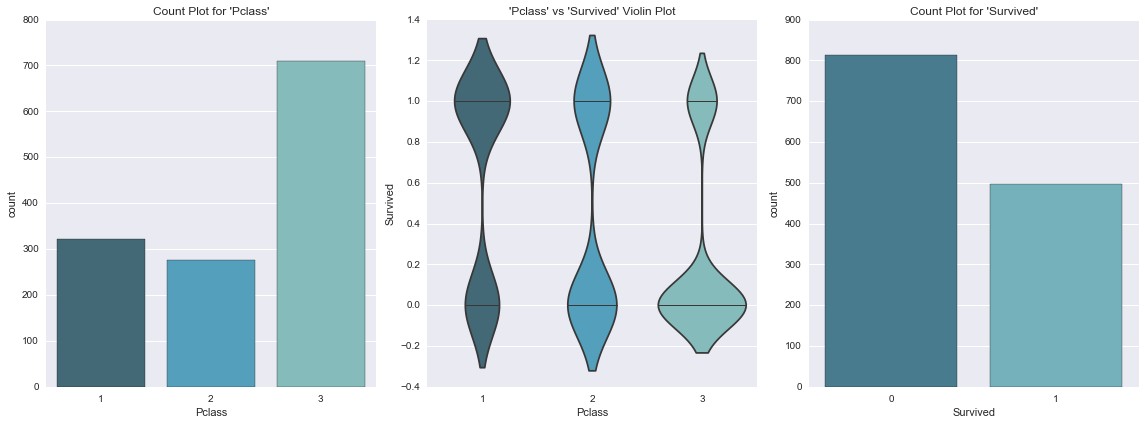

'Survived' vs 'Pclass' Contingency Heatmap:


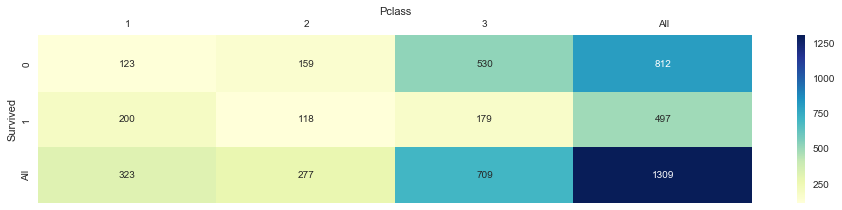

'Survived' vs 'Pclass' Normalised Contingency Heatmap:


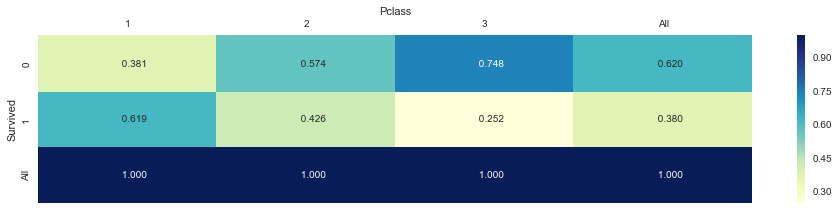

χ²: Survived and Pclass
H0: The null hypothesis for this χ² test is that Survived and Pclass are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and Pclass are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 6.16297663551e-29 and a χ² statistic of 129.912815632 with 2 degrees of freedom we
reject the null hypothesis and accept that Survived and Pclass are in some way dependent [7].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and Pclass has a value of 0.315033091053
equating to a medium effect size [8][9].
-----------------------------------------------------------------------------------------------------


In [10]:
descriptive_statistics_of_numeric_series('Survived', "Survived")
visual_analysis_of_two_categorical_variables('Pclass', 'Survived')

heatmap_title = "'Survived' vs 'Pclass' Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'Pclass'), heatmap_title)

heatmap_title = "'Survived' vs 'Pclass' Normalised Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'Pclass', normalise=True), heatmap_title)

chi_squared_and_carmers_v_anlysis('Survived', 'Pclass')

Sadly, passengers with higher socio-econmic status were more likely to survive. This could be in part due to the fact that first class cabins were closer to the life boats than third class cabins [10]. The χ² test of indepence resulted in a rejection of the null hypothesis inidcating that that 'Survived' and 'Pclass' are dependent to a 99.9% degree of confidence. The value of Cramer's V indicates that the dependence between these variables has a medium effect size. Ultimately, the relationship is quite clear. A passenger in first class is nearly twice as likely to have survived than not, a second class passenger was slightly less lilkely to surve than not where as a third class passenger was three times as likely not to survive as they were to survive. The true cause of this pattern is open to speculation, but the relationship is clear.

## Were men or women more likely to survive?

Summary Statistics for 'Survived'
Median: 0.0
Mean: 0.379679144385
Standard Deviation: 0.485492487148




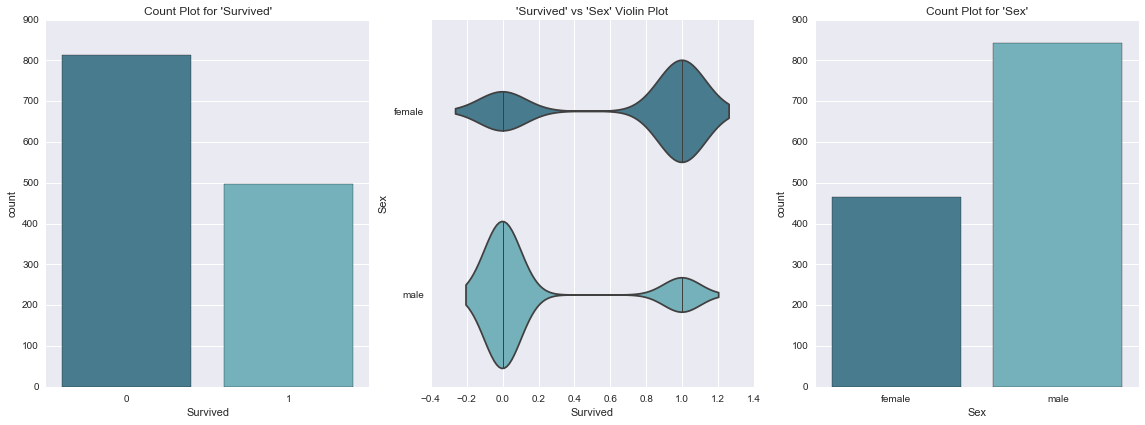

'Survived' vs 'Sex' Contingency Heatmap:


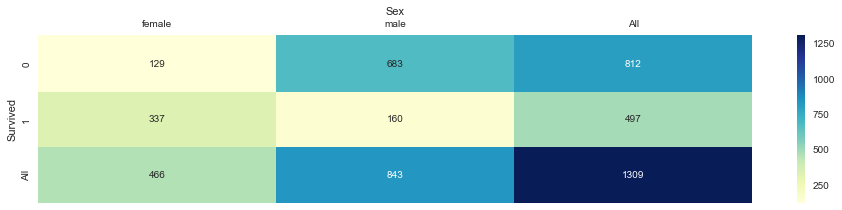

'Survived' vs 'Sex' Normalised Contingency Heatmap:


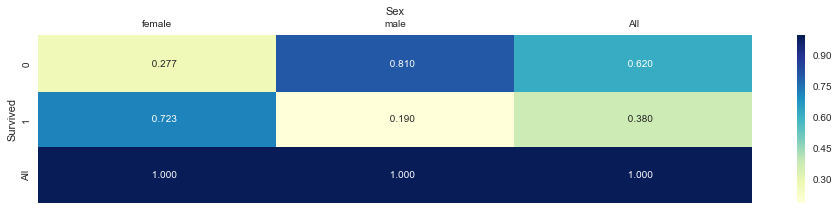

χ²: Survived and Sex
H0: The null hypothesis for this χ² test is that Survived and Sex are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and Sex are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 2.49545701634e-80 and a χ² statistic of 360.240801871 with 1 degree of freedom we
reject the null hypothesis and accept that Survived and Sex are in some way dependent [7].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and Sex has a value of 0.524597995799
equating to a large effect size [8][9].
-----------------------------------------------------------------------------------------------------


In [11]:
descriptive_statistics_of_numeric_series('Survived', "Survived")
visual_analysis_of_two_categorical_variables('Survived', 'Sex')

heatmap_title = "'Survived' vs 'Sex' Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'Sex'), heatmap_title)

heatmap_title = "'Survived' vs 'Sex' Normalised Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'Sex', normalise=True), heatmap_title)

chi_squared_and_carmers_v_anlysis('Survived', 'Sex')

Of all the relationships analysed here, the relationship between whether a passenger survived and their gender has the largest effect size as determined by the calculation of Cramer's V. It is the only relationship that has been deemed to have a large effect size. The χ² statistic is so large that the p-value has 79 leading zeroes! A female passenger is nearly three times more likely to have survived than not while male passenegers are four times more likely not to have survived than survived. It is very likely that it is this relationship that has perpetuated the idea of 'women and children first' when saving passengers on a sinking ship although contemporay evidence suggests that the sinking of the Titanic may be anomolous in this trend [11].

## Were passengers of certain ages likely to survive?

Summary Statistics for 'Survived'
Median: 0.0
Mean: 0.379679144385
Standard Deviation: 0.485492487148


Summary Statistics for 'Age'
Median: 28.0
Mean: 29.6825706714
Standard Deviation: 14.1071182507




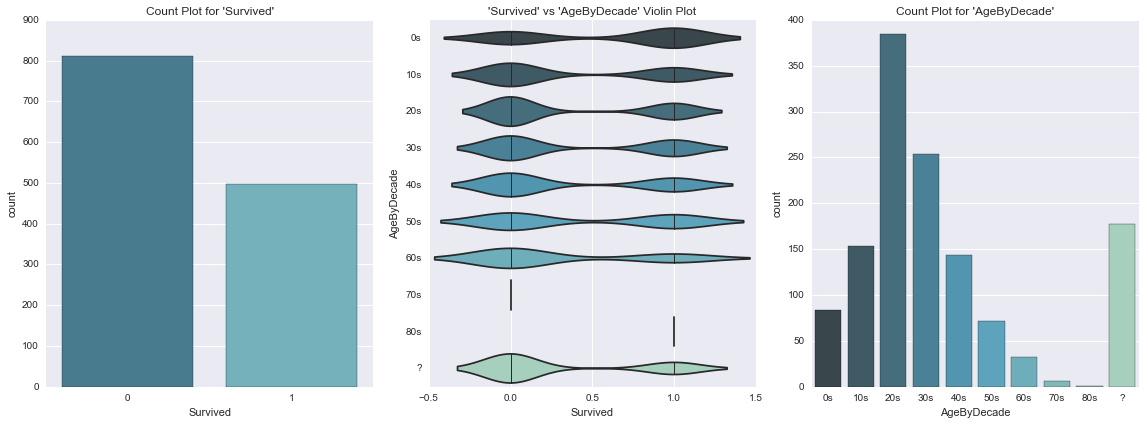

'Survived' vs 'AgeByDecade' Contingency Heatmap:


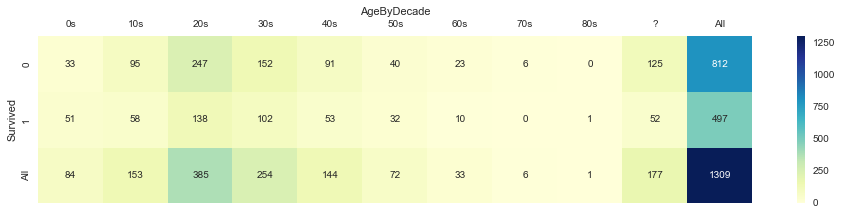

'Survived' vs 'AgeByDecade' Normalised Contingency Heatmap:


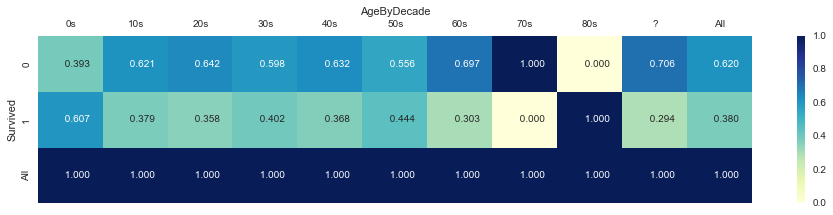

χ²: Survived and AgeByDecade
H0: The null hypothesis for this χ² test is that Survived and AgeByDecade are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and AgeByDecade are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 0.000147824310735 and a χ² statistic of 32.7464979946 with 9 degrees of freedom we
reject the null hypothesis and accept that Survived and AgeByDecade are in some way dependent [7].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and AgeByDecade has a value of 0.158165809263
equating to a small effect size [8][9].
-----------------------------------------------------------------------------------------------------


In [12]:
descriptive_statistics_of_numeric_series('Survived', "Survived")
descriptive_statistics_of_numeric_series('Age', 'Age')
visual_analysis_of_two_categorical_variables('Survived', 'AgeByDecade')

heatmap_title = "'Survived' vs 'AgeByDecade' Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'AgeByDecade'), heatmap_title)

heatmap_title = "'Survived' vs 'AgeByDecade' Normalised Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'AgeByDecade', normalise=True), heatmap_title)

chi_squared_and_carmers_v_anlysis('Survived', 'AgeByDecade')

As a whole, the effect size of a passenger's decade of age on whether they survived is small (as interpreted from the value of Cramer's V for these two variables). According to the χ² statistic, the two variables have been found to be dependent. It is interesting to note that for every category of age, where there is more than one sample, there is only one category where passengers are more likley to survive than not and that is for children under the age of 10. Based on the violin plots and normalised contingency heatmap, it appears that passengers were worst off if they were in their 20s or 60s. Fewer people in their 60s survived, but the total sample of passengers in their 60s is smaller than that of passengers in their 20s. It is hard to draw any conclusions about passnegers in their 70s and 80s as the sample sizes are so small.

It is not clear whether there is a true relationship, even if it is small, between 'AgeByDecade' and 'Survived' or whther the relationship is confounded by the records with missing ages. It is also possible that the relationship is counfounded by the records with very high ages (70s and 80s) that not only have very few instances but also communicate a very strong signal toward survivorship as there are not any passengers in their 70's who survived and the only passenger in their 80s survived. The easiest way to determine which is the case is to rerun the analysis including only passengers who have an age less than 70 and compare the results.

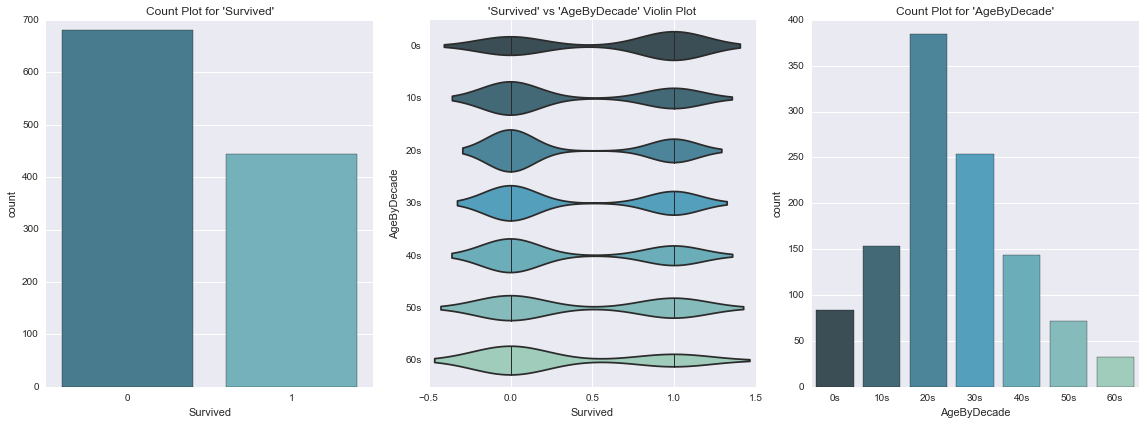

'Survived' vs 'AgeByDecade' Normalised Contingency Heatmap:


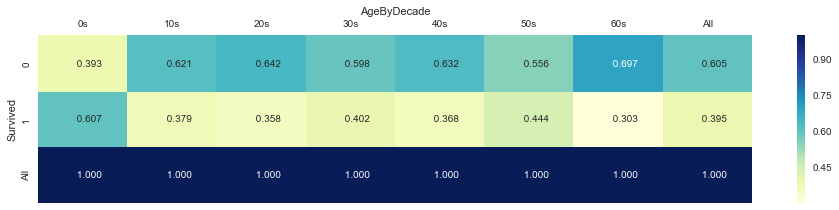

χ²: Survived and AgeByDecade
H0: The null hypothesis for this χ² test is that Survived and AgeByDecade are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and AgeByDecade are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 0.00222925396874 and a χ² statistic of 20.5280374329 with 6 degrees of freedom we
fail to reject the null hypothesis that Survived and AgeByDecade are independent [7].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and AgeByDecade has a value of 0.135081991342
equating to a small effect size [8][9].
-----------------------------------------------------------------------------------------------------


In [13]:
visual_analysis_of_two_categorical_variables('Survived', 'AgeByDecade', df_with_consistent_ages)

heatmap_title = "'Survived' vs 'AgeByDecade' Normalised Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'AgeByDecade', df_with_consistent_ages, normalise=True), heatmap_title)

chi_squared_and_carmers_v_anlysis('Survived', 'AgeByDecade', df_with_consistent_ages)

By removing passenegers who were 70 or older and those of unkown age, the χ² test shifts from rejecting the null hypothesis to failing to reject the null hypothesis at the 99.9% degree of confidence used in this investigation. It is worth noting that the p-value for the χ² is still small by normal standards given it is less than 0.05, but considering that the largest p-value for all of the other variables tested has 18 leading zeroes, a value of 0.0022 is massive by comparison. In the end, it is not consclusive evidence that there is not a relationship between 'Survived' and 'AgeByDecade', but it is clear that the survivorship of the oldest passenegers and the passengers of unkown age has a noticeable impact on the dependence between these variables. 

## Is a passenger's socio-economic status, gender, or age the better indicator of their survival?

One way to compare the impact of a passenger's socio-economic status, gender and age as different indicators that might suggest whther that passenger was likely to survive the sinking of the Titanic or not is to compare the Cramer's V values for each of those variables. As a part of the analysis of the last few questions, these values have already been calculated. As we have already found, a passenger's gender acts as very strong indicator ('large' effect size given a Cramer's V of 0.52) of survival where women were far more likely to survive while the oposite was true for men. The second best indicator for survival of the three analsysed was socio-econmic status.

## Conclussions and Further Analysis

The analysis above suggests that the most likely passengers to survive were rich women. We can do further anlysis to see how much better off rich women were compared to less well off women and men of varying socio econmic status.

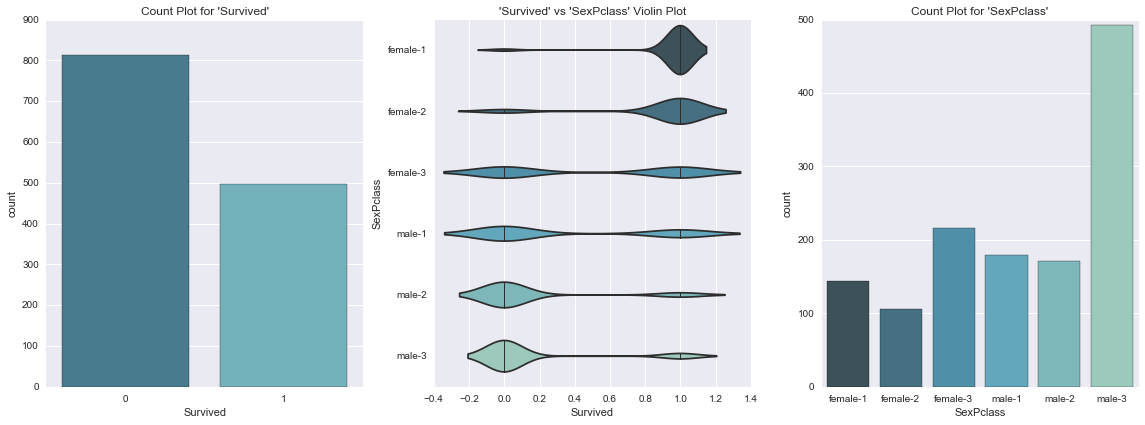

'Survived' vs 'SexPclass' Contingency Heatmap:


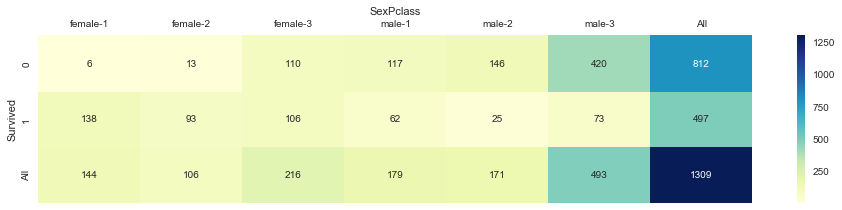

'Survived' vs 'SexPclass' Normalised Contingency Heatmap:


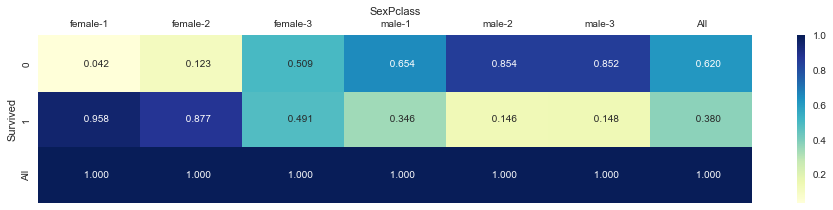

χ²: Survived and SexPclass
H0: The null hypothesis for this χ² test is that Survived and SexPclass are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and SexPclass are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 1.48747249555e-101 and a χ² statistic of 480.214404161 with 5 degrees of freedom we
reject the null hypothesis and accept that Survived and SexPclass are in some way dependent [7].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and SexPclass has a value of 0.605686324535
equating to a large effect size [8][9].
-----------------------------------------------------------------------------------------------------


In [14]:
visual_analysis_of_two_categorical_variables('Survived', 'SexPclass', df_with_combined_sex_and_pclass)

heatmap_title = "'Survived' vs 'SexPclass' Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'SexPclass', df_with_combined_sex_and_pclass), heatmap_title)

heatmap_title = "'Survived' vs 'SexPclass' Normalised Contingency Heatmap:"
heatmap(table_of_frequencies('Survived', 'SexPclass', df_with_combined_sex_and_pclass, normalise=True), heatmap_title)

chi_squared_and_carmers_v_anlysis('Survived', 'SexPclass', df_with_combined_sex_and_pclass)

This further analysis confirms the suspicion that the safest passenegers were rich women. Of the females in first class in this data set, all but 6 survived while fewer than half of the 216 females in 3rd class survived. The χ² test with the combination of 'Sex' and 'Pclass' compared to 'Survived' is even more definitive than the previous analysis where only 'Sex' was considered. The Cramer's V measure has also increased from 0.52 to 0.60. It would be inappropriate to claim that being rich and or being female *caused* these passenges to survive, but is likely that being rich and being female *afforded these passenegers the opportunity* to survive. It is likely that first class passengers were closer to the life boats so were more likely to to have the time to safely escape the sinking ship [10]. It is also likely that the prioritisation of 'women and children first' allowed females to escape while there was the opportunity to do so [12]. The combination of these two factors are a likely explanation for why females in first class had nearly a 96% survival rate. Of course, it is impossible to be certain of this without the presentation of considerably more information.

There are limitations to the conclusions that can be darwn from the analysis of this data. The data, even with the additional test data from Kaggle.com, only represents a fraction of all of the Titanic passengers. The data represents 1309 passengers while it is estimated that there were 2344 passengers aboard the Titanic for the maiden voyage [4]. If these 1309 records were selected randomly, then the sample size would be large enough to draw very confident conclusions, but we do not know how the sample was selected so our conclusions can only represent patterns that exist within the given subset of records. It also is not clear which source was used to collect the given Titanic passenger data. While cleaning the test data and manually adding the survivorship column, it became clear that there are inconsistencies and ambiguities between all three sources, Kaggle [1], The Encyclopedia Titanica [2,3], and Wikipedia [4]. Even though there was only a small amount of missing data, it is very possible the 177 records with missing values for the 'Age' column skewed and may be even confounded the results of the 'AgeByDecade' vs. 'Survived' anlysis.

Despite these limitations, it is still clear that some of the trends within the data analysed represent significant relationships. The analysis in the project has uncovered the following interesting details and trends within the data:

- A few passengers travelled aboard the Titanic without paying for their tickets, but most of those passengers ultimately paid with their lives.
- 3rd class passengers were most likely to have either no or many family members with them while passengers with only one other family member were most likely to be first class passengers and the same trend exists for passengers with 3 other family members were most likely to be staying in second class cabins.
- More than 90% of the passengers who embaked from Queenstown were 3rd class passengers.
- There was a strong relationship between a passengers socio-economic class and their likelihood for survival with 1st class passengers being the most likely to survive and 3rd class passengers being the least likely.
- Female passengers were far more likely to survive than male passengers.
- Among passengers younger than 70 whose ages are known, there is a relationship betwen their age in decades and their likelihood to have survived with passengers younger than 10 being the most likely to have survived.
- Of the variables, 'Pclass', 'Sex', and 'AgeByDecade', 'Sex' has the most significant rleationship with 'Survived'.
- The combination of a passengers sex and socio-economic status provides the strongest indicator of survival among all those analysed.

From these discoveries, we can conslude that, within the subset of passengers analysed, the passengers who were most likely to survive were females who stayed in first class cabins. This relationship is so significant that nearly 96% of first class female passengers survived.

### References

[1] "Titanic: Machine Learning from Disaster." Data. Accessed March 27, 2016. https://www.kaggle.com/c/titanic/data.

[2] "Titanic Survivors | Encyclopedia Titanica." Encyclopedia Titanica. Accessed March 20, 2016. http://www.encyclopedia-titanica.org/titanic-survivors/.

[3] "Victims of the Titanic Disaster | Encyclopedia Titanica." Encyclopedia Titanica. Accessed March 20, 2016. http://www.encyclopedia-titanica.org/titanic-victims/.

[4] Wikipedia contributors, "Passengers of the RMS Titanic," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Passengers_of_the_RMS_Titanic&oldid=710234222 (accessed March 20, 2016).

[5] "Harland & Wolff : Titanic Guarantee Group | Encyclopedia Titanica." Encyclopedia Titanica. Accessed March 19, 2016. http://www.encyclopedia-titanica.org/titanic-guarantee-group/.

[6] Wikipedia contributors, "Contingency table," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Contingency_table&oldid=708180357 (accessed March 19, 2016).

[7] Wikipedia contributors, "Chi-squared test," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=710514353 (accessed March 19, 2016).

[8] Wikipedia contributors, "Cramér's V," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Cram%C3%A9r%27s_V&oldid=705563259 (accessed March 14, 2016).

[9] Wikipedia contributors, "Effect size," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Effect_size&oldid=706273103 (accessed March 14, 2016).

[10] "Titanic Deckplans." Encyclopedia Titanica. Accessed March 19, 2016. http://www.encyclopedia-titanica.org/titanic-deckplans/.

[11] Pasick, Adam. "“Women and Children First” Is a Maritime Disaster Myth-it’s Really “every Man for Himself”." Quartz. January 6, 2015. Accessed March 19, 2016. http://qz.com/321827/women-and-children-first-is-a-maritime-disaster-myth-its-really-every-man-for-himself/.

[12] Wikipedia contributors, "Women and children first," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Women_and_children_first&oldid=709932851 (accessed March 19, 2016).